In [5]:
from typing import TypedDict, Annotated, List
from langchain_core.documents import Document
import operator

In [15]:
class GraphState(TypedDict):
    context : Annotated[List[Document],operator.add]
    answer : Annotated[List[Document],operator.add]
    question : Annotated[str,"Annotated question"]
    sql_query : Annotated[str,"Annotated sql query"]
    binary_score : Annotated[str,"Annotated binary score"]

In [16]:
def retriever(state : GraphState) -> GraphState:
    documents = "검색된 문서들"
    return GraphState(context=documents)

def rewrite_qestion(state : GraphState) -> GraphState:
    rewritten_question = "재작성된 질문"
    return GraphState(question=rewritten_question)

def add_summary(state : GraphState) -> GraphState:
    summary = "요약된 답변"
    return GraphState(answer=summary)

def decision(state : GraphState) -> GraphState:
    if state['answer']:
        return "통과"
    else:
        return "재시도"

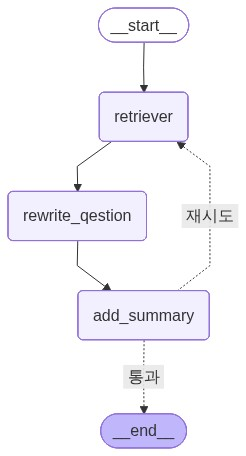

In [18]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

workflow = StateGraph(GraphState)

workflow.add_node("retriever",retriever)
workflow.add_node("rewrite_qestion", rewrite_qestion)
workflow.add_node("add_summary", add_summary)

workflow.add_edge("retriever", "rewrite_qestion")
workflow.add_edge("rewrite_qestion", "add_summary")
workflow.add_conditional_edges(
    "add_summary",
    decision,
    {
        "통과": END,
        "재시도" : "retriever"
    }
)

workflow.set_entry_point("retriever")

memory = MemorySaver()

app = workflow.compile(checkpointer=memory)

display(Image(app.get_graph().draw_mermaid_png()))